<a href="https://colab.research.google.com/github/ishakale0908/BML/blob/main/expt10_bml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

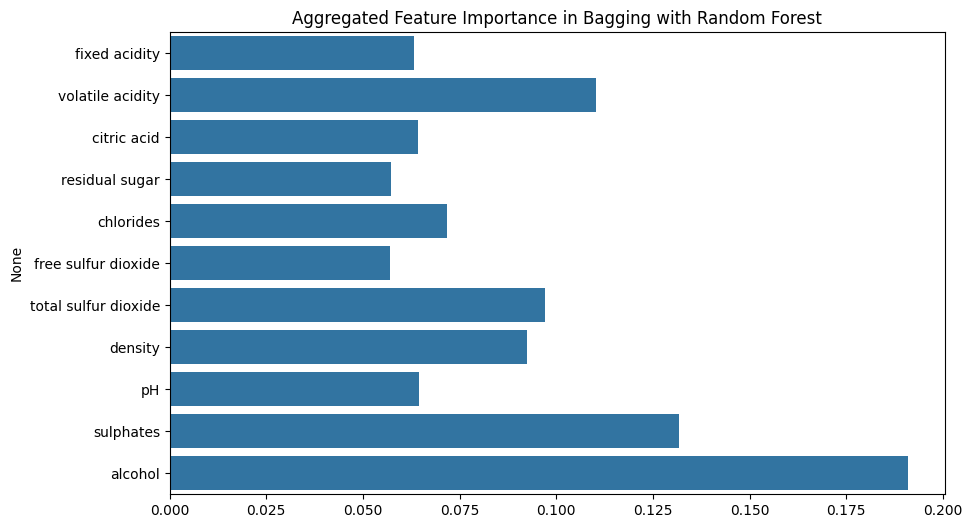

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# 2. Explore briefly
print(df.head())

# 3. Create target and features
X = df.drop("quality", axis=1)
y = df["quality"]

# Optional: convert quality to binary (for classification)
# Let's say: 3–5 = bad, 6–8 = good
y_binary = y.apply(lambda q: 1 if q >= 6 else 0)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# 5. Bagging with Random Forest as Base Estimator
rf_base = RandomForestClassifier(n_estimators=10, random_state=42)
bagging_model = BaggingClassifier(estimator=rf_base, n_estimators=50, random_state=42)

# 6. Train Bagging Model
bagging_model.fit(X_train, y_train)

# 7. Predictions
y_pred = bagging_model.predict(X_test)

# 8. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 9. Feature Importance: Aggregate from the base estimators
# Extract the feature importances from each base estimator (RandomForest)
importances = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)
features = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Aggregated Feature Importance in Bagging with Random Forest")
plt.show()
